# Data : Credit repayment difficulty rates among customers
    
The variables are the following:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse (Target variable / label)

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)


In [ ]:
# Load in our libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
sns.set(style='white', context='notebook', palette='deep')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path_folder = '/content/drive/MyDrive/Colab Notebooks/FINA5240/Lecture4/'

Mounted at /content/drive/


## Exploratory Data Analysis

In [ ]:
train = pd.read_csv(path_folder + "credit_rating_data.csv")

In [ ]:
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


 **Inferences:**

1.Number of Dependents and Monthly Income contain NaN values


2.Variables like Age may contain error

### Distribution - Dependent variable

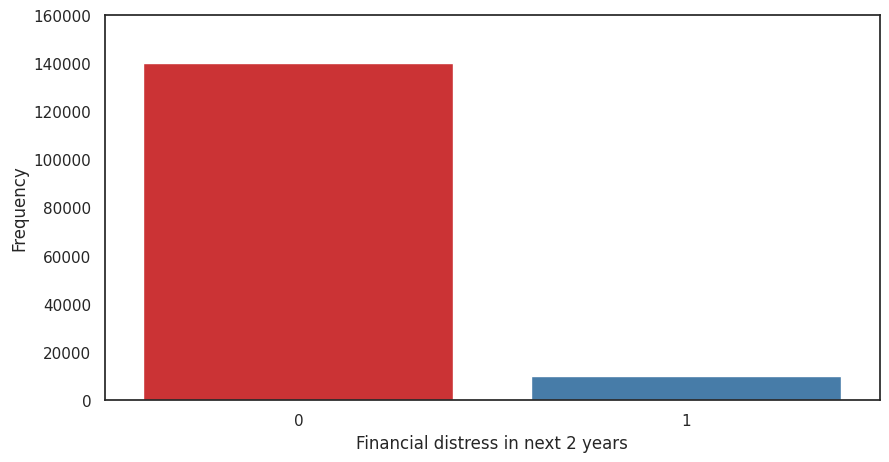

In [ ]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial distress in next 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

In [ ]:
train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
train = train.drop(columns=["Unnamed: 0"])

 Using 1.5 times the IQR as the outlier step is a common practice in identifying outliers based on the Tukey's fences method. The idea is that data points that are more than 1.5 times the IQR away from the lower or upper quartiles are considered potential outliers.

### (If you like, before dropping NaNs, you can fill missing value)

In [ ]:
train.MonthlyIncome = train.MonthlyIncome.fillna(train.MonthlyIncome.median())

### Or we can just drop them...

### Get rid of outliers

In [ ]:
def drop_outliers(df, features):
    """
    Drops outliers in a DataFrame based on the specified features.
    Outliers are data points that fall below the 5th percentile or above the 95th percentile.

    :param df: DataFrame containing the data
    :param features: List of feature columns to drop outliers from
    :return: DataFrame with outliers dropped
    """

    for col in features:
        # Calculate the lower and upper percentiles
        Q_lo = np.percentile(df[col], 1)
        Q_hi = np.percentile(df[col], 99)

        # Retain only data points within the desired range
        df = df[(df[col] >= Q_lo) & (df[col] <= Q_hi)]

    return df


In [ ]:
train = train.dropna()

In [ ]:
train = drop_outliers(train, [
    "RevolvingUtilizationOfUnsecuredLines", "age",
    "NumberOfTime30-59DaysPastDueNotWorse", "DebtRatio",
    "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate", "NumberRealEstateLoansOrLines",
    "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"])

In [ ]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
train = train.reset_index(drop=True)

In [ ]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000,133197.000000
mean,0.053762,0.305637,52.122998,0.204261,262.105280,6005.535860,8.335758,0.049333,0.971944,0.035121,0.727682
std,0.225549,0.339136,14.134059,0.569369,772.410648,3486.838192,4.627203,0.252927,0.928776,0.184086,1.046289
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029674,41.000000,0.000000,0.175646,3825.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.146540,52.000000,0.000000,0.356117,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.521114,62.000000,0.000000,0.737393,7404.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.092301,86.000000,4.000000,4940.000000,23750.000000,24.000000,2.000000,4.000000,1.000000,4.000000


#### Correlation

Financial distress is highly correlated with age, previous late payments, and the number of dependents.

In [ ]:
train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.235551,-0.099135,0.221295,-0.021579,-0.048648,-0.021785,0.263174,-0.019822,0.183623,0.040120
RevolvingUtilizationOfUnsecuredLines,0.235551,1.000000,-0.258583,0.216682,-0.027855,-0.082133,-0.159486,0.221937,-0.072302,0.149544,0.090438
age,-0.099135,-0.258583,1.000000,-0.073777,0.039738,0.085206,0.146702,-0.076752,0.036575,-0.061503,-0.225832
NumberOfTime30-59DaysPastDueNotWorse,0.221295,0.216682,-0.073777,1.000000,-0.010313,-0.000641,0.072473,0.185377,0.028527,0.211556,0.063152
DebtRatio,-0.021579,-0.027855,0.039738,-0.010313,1.000000,-0.092066,0.050170,-0.018844,0.147177,-0.011971,-0.090219
MonthlyIncome,-0.048648,-0.082133,0.085206,-0.000641,-0.092066,1.000000,0.240154,-0.058562,0.331778,-0.028190,0.182746
NumberOfOpenCreditLinesAndLoans,-0.021785,-0.159486,0.146702,0.072473,0.050170,0.240154,1.000000,-0.107530,0.411173,-0.024782,0.069744
NumberOfTimes90DaysLate,0.263174,0.221937,-0.076752,0.185377,-0.018844,-0.058562,-0.107530,1.000000,-0.078162,0.198047,0.023190
NumberRealEstateLoansOrLines,-0.019822,-0.072302,0.036575,0.028527,0.147177,0.331778,0.411173,-0.078162,1.000000,-0.026512,0.145140
NumberOfTime60-89DaysPastDueNotWorse,0.183623,0.149544,-0.061503,0.211556,-0.011971,-0.028190,-0.024782,0.198047,-0.026512,1.000000,0.028919


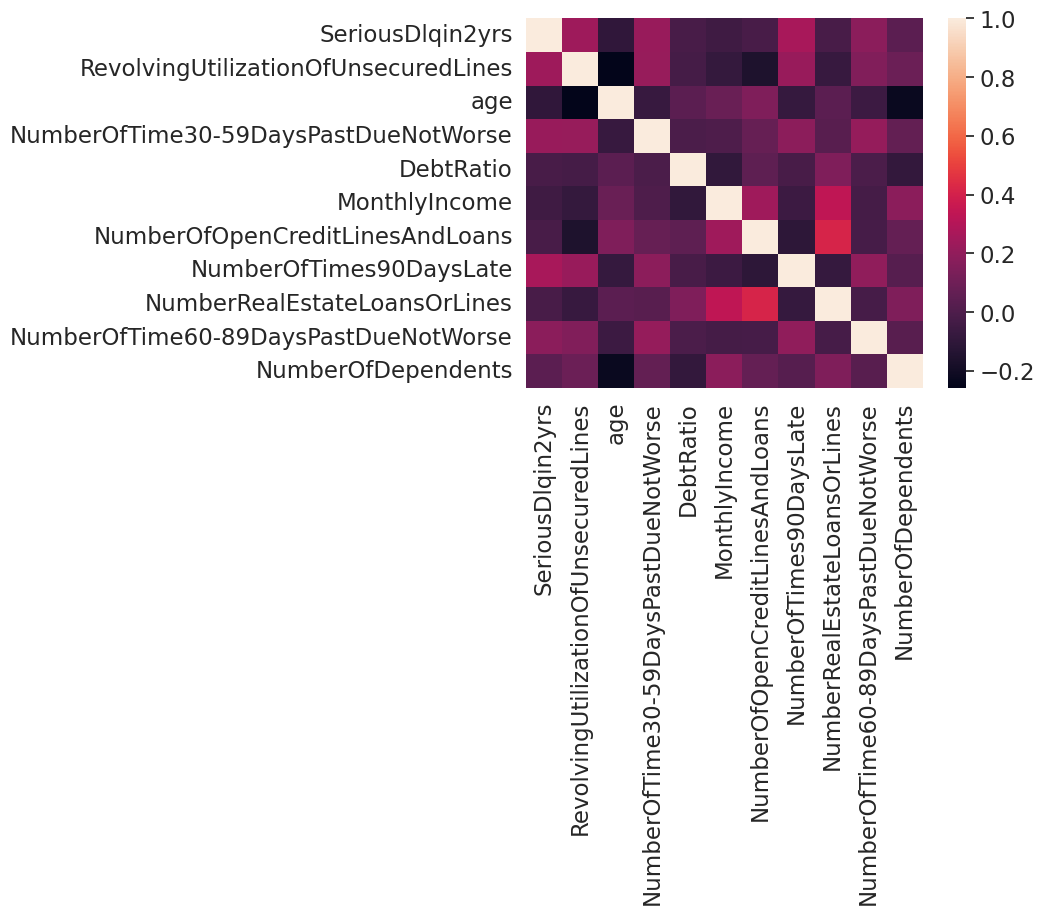

In [ ]:
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f")

### Credit Scoring Model

In [ ]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
4,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0


In [ ]:
train.columns[1:]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
y = train['SeriousDlqin2yrs']
X = train[train.columns[1:]]

from sklearn.model_selection import train_test_split
# stratify: keep class proportions the same as y in both train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432, stratify=y)

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

## Check feature importance

In [ ]:
clf.feature_importances_

array([0.20229914, 0.13768233, 0.04091167, 0.2011791 , 0.16443916,
       0.09793368, 0.05370889, 0.03354015, 0.02360033, 0.04470556])

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

<Axes: xlabel='feature'>

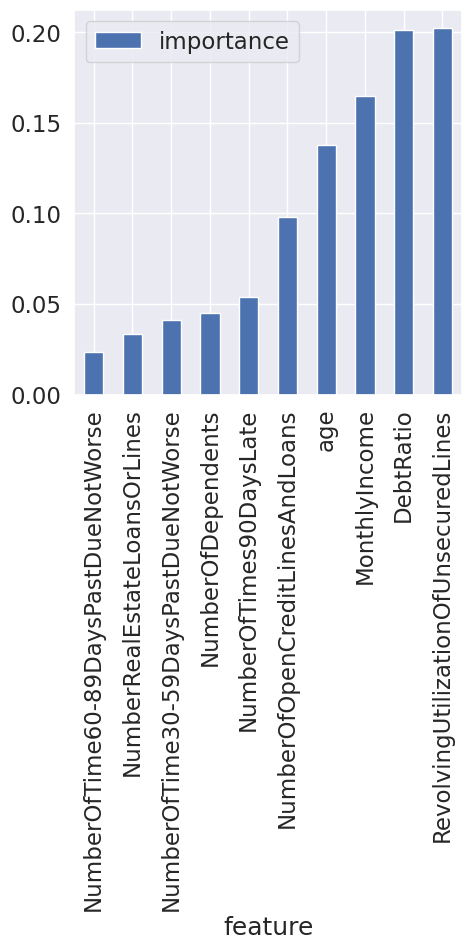

In [ ]:
features.plot(kind='bar', figsize=(5, 5))

## Check in-sample performances

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_train, clf.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100828
           1       1.00      0.98      0.99      5729

    accuracy                           1.00    106557
   macro avg       1.00      0.99      1.00    106557
weighted avg       1.00      1.00      1.00    106557



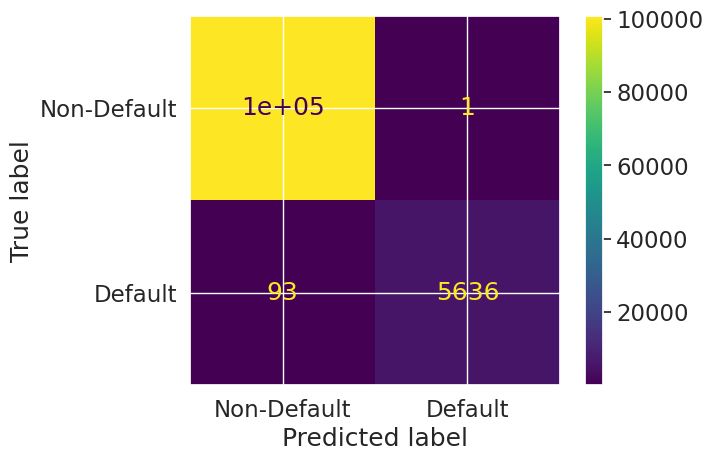

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.pyplot import figure

confusion_matrix = metrics.confusion_matrix(y_train, clf.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Default", "Default"])

cm_display.plot()
plt.show()

## Check out-of-sample performances

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     25208
           1       0.47      0.08      0.14      1432

    accuracy                           0.95     26640
   macro avg       0.71      0.54      0.56     26640
weighted avg       0.92      0.95      0.93     26640



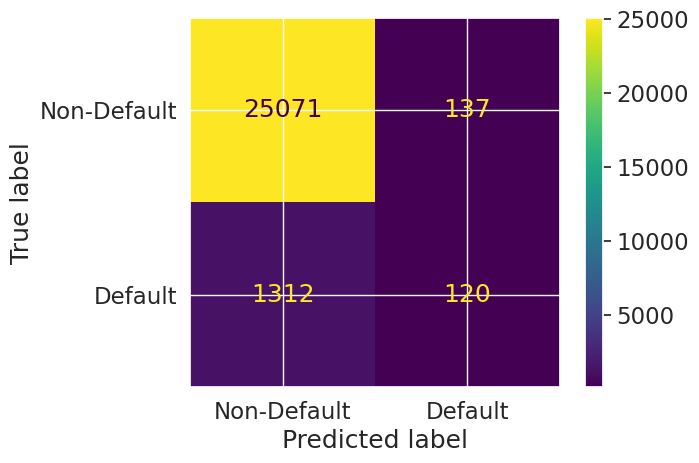

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Default", "Default"])

cm_display.plot()
plt.show()

In [ ]:
pd.DataFrame(clf.predict_proba(X_test))

,0,1
0,0.78,0.22
1,0.98,0.02
2,0.84,0.16
3,1.00,0.00
4,0.90,0.10
...,...,...
26635,0.92,0.08
26636,0.92,0.08
26637,0.98,0.02
26638,0.92,0.08


### In real life, we need to understand the context, i.e. how much is a default costing us? What is the missed revenue by misclassfying and refusing a non-default loan

### Here, we can adjust the "strictness" by adjusting the threshold

In [ ]:
proba_predictions = clf.predict_proba(X_test)

In [ ]:
proba_threshold = 0.1

screened_prediction = []
for i in range(len(proba_predictions)):
  if proba_predictions[i,1] > proba_threshold:
    screened_prediction.append(1)
  else:
    screened_prediction.append(0)


In [ ]:
report = classification_report(y_test, screened_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     25208
           1       0.20      0.59      0.30      1432

    accuracy                           0.85     26640
   macro avg       0.59      0.73      0.61     26640
weighted avg       0.93      0.85      0.88     26640



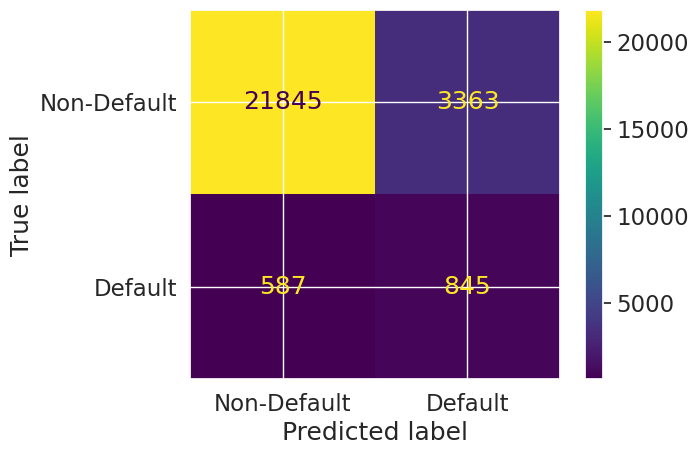

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, screened_prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Default", "Default"])

cm_display.plot()
plt.show()

## Before we go further, we can strengthen model strength by using the SMOTE technique. The impact will be greater for noisier data

## Use data augmentation:
## Synthetic Minority Oversampling Technique Smote for imbalanced data
SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique to address the class imbalance in datasets. Different variants of SMOTE are designed to handle specific imbalanced dataset scenarios more effectively.

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [ ]:
y_train.value_counts()

0    100828
1      5729
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
# Apply different SMOTE types
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train_smote, y_train_smote)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     25208
           1       0.19      0.29      0.23      1432

    accuracy                           0.89     26640
   macro avg       0.57      0.61      0.59     26640
weighted avg       0.92      0.89      0.90     26640



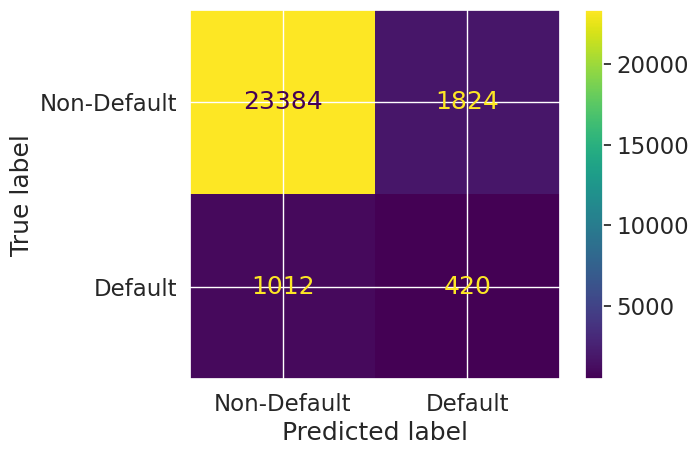

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Default", "Default"])
cm_display.plot()
plt.show()

In [ ]:
borderline_smote = BorderlineSMOTE()
X_train_borderline, y_train_borderline = borderline_smote.fit_resample(X_train, y_train)

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train_borderline, y_train_borderline)

from sklearn.metrics import classification_report
report = classification_report(y_test, clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     25208
           1       0.20      0.23      0.22      1432

    accuracy                           0.91     26640
   macro avg       0.58      0.59      0.58     26640
weighted avg       0.92      0.91      0.91     26640



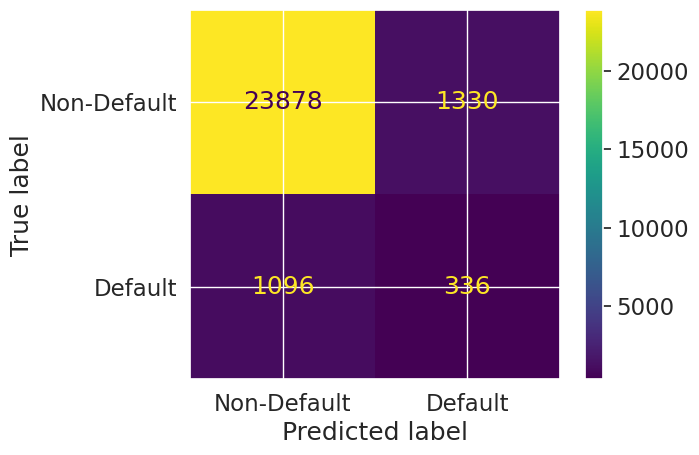

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Non-Default", "Default"])

cm_display.plot()
plt.show()

Remember to choose a proper threshold before you can compare it with not using SMOTE.

### Now, what should we do? What's the right threshold?

When the model prediction is below the threshold, we make the loan. If above, we reject the loan. Assuming the non-default prediction makes 7% interest rate on the loan per year, and the default loses all the loan amount. This means the profit = 7% * number_of_non_defaults - 100% * number_of_defaults. The average loan is USD100000

## We can do it for random forest too

In [ ]:
# Calculate the revenue for different threshold values
thresholds = [i/100 for i in range(101)]
revenues = []
y_pred = clf.predict_proba(X_test)[:, 1]

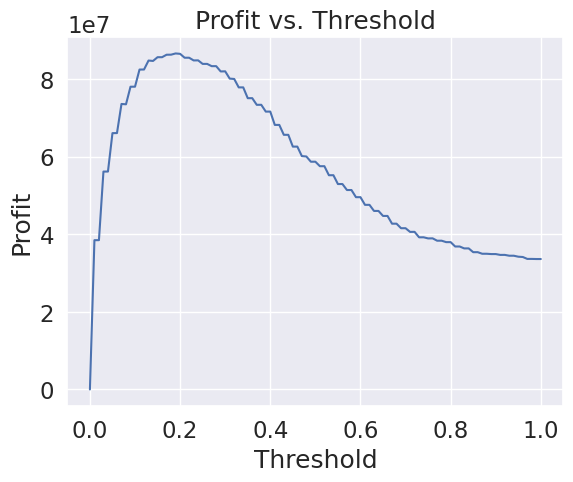

In [ ]:
for threshold in thresholds:
      # Get the probability of positive class
    y_pred_binary = [1 if p >= threshold else 0 for p in y_pred]
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_binary).ravel()
    non_default_loans = tn
    default_loans = fn
    revenue = (0.07*non_default_loans - default_loans) * 100000
    revenues.append(revenue)

# Plot the revenue versus threshold graph
plt.plot(thresholds, revenues)
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs. Threshold')
plt.show()


## This way, by developing sophisticated models and understanding the context, we can optimize the threshold to make lending decisions. It's a simplified case, but it's very close to how fintech lenders operate.

Credit risk assessment is a critical task for lending companies to evaluate the creditworthiness of potential borrowers.
Machine learning models have become increasingly popular for credit risk assessment due to their ability to handle large volumes of data and identify complex patterns in the data.

*   Common machine learning models for credit risk assessment include decision trees, random forests, logistic regression, and neural networks.

*   It's essential to evaluate the performance of credit risk models using appropriate metrics such as accuracy, precision, recall, F1 score, and the confusion matrix.

*   Financial institutions use credit risk models for various purposes, such as loan origination, underwriting, and portfolio management.

*   Popular lending companies such as Lending Club, Zopa, and Prosper Marketplace use machine learning models to assess credit risk and determine the interest rates for loans.

# (We will come back to this later) Neural Network Implementation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize your data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


Epoch 1/50, Loss: 0.5515414998198773
Epoch 2/50, Loss: 0.5204296931185282
Epoch 3/50, Loss: 0.5107717440849672
Epoch 4/50, Loss: 0.5046990602447382
Epoch 5/50, Loss: 0.5002576704343784
Epoch 6/50, Loss: 0.4911813133474886
Epoch 7/50, Loss: 0.48226495633425087
Epoch 8/50, Loss: 0.4760100550525081
Epoch 9/50, Loss: 0.47165197665658587
Epoch 10/50, Loss: 0.46779792855378455
Epoch 11/50, Loss: 0.46490406594248324
Epoch 12/50, Loss: 0.46231563682640464
Epoch 13/50, Loss: 0.45993327374308424
Epoch 14/50, Loss: 0.4581370462720193
Epoch 15/50, Loss: 0.4562998813004297
Epoch 16/50, Loss: 0.4546526406392133
Epoch 17/50, Loss: 0.452647646974721
Epoch 18/50, Loss: 0.4508703031480195
Epoch 19/50, Loss: 0.44973770898779625
Epoch 20/50, Loss: 0.44814995030757254
Epoch 21/50, Loss: 0.44677766058557394
Epoch 22/50, Loss: 0.44583453245622
Epoch 23/50, Loss: 0.4446614361816399
Epoch 24/50, Loss: 0.4434716850343528
Epoch 25/50, Loss: 0.4428648708025927
Epoch 26/50, Loss: 0.442004932097227
Epoch 27/50, Los

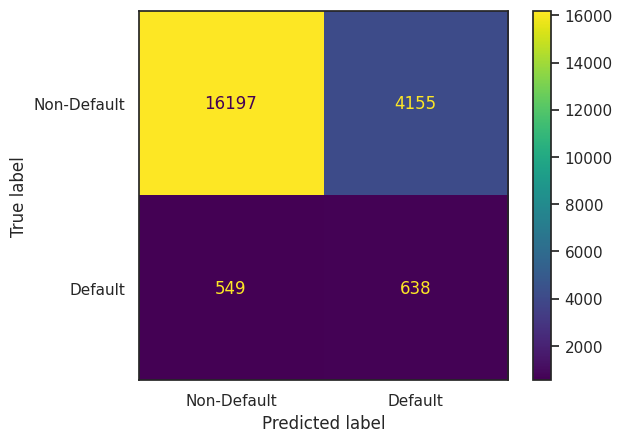

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create PyTorch datasets for train and test sets
X_train_tensor = torch.tensor(X_train_smote, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train_smote.values, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader objects for train and test datasets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the layers of the neural network model
input_size = X_train_smote.shape[1]
hidden_size = 64
output_size = 1

fc1 = nn.Linear(input_size, hidden_size).to(device)
relu = nn.ReLU()
fc2 = nn.Linear(hidden_size, output_size).to(device)
sigmoid = nn.Sigmoid()

# Instantiate the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(list(fc1.parameters()) + list(fc2.parameters()), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        x = fc1(inputs)
        x = relu(x)
        x = fc2(x)
        outputs = sigmoid(x)

        loss = criterion(outputs.squeeze(), targets)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss}")

# Evaluate the model
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        x = fc1(inputs)
        x = relu(x)
        x = fc2(x)
        outputs = sigmoid(x)

        y_pred.extend(outputs.squeeze().cpu().numpy())

# Calculate the metrics
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred_binary))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_binary)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Non-Default", "Default"])
cm_display.plot()
plt.show()


In [ ]:
model.eval()
y_pred = []

with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        y_pred.extend(outputs.squeeze().cpu().numpy())

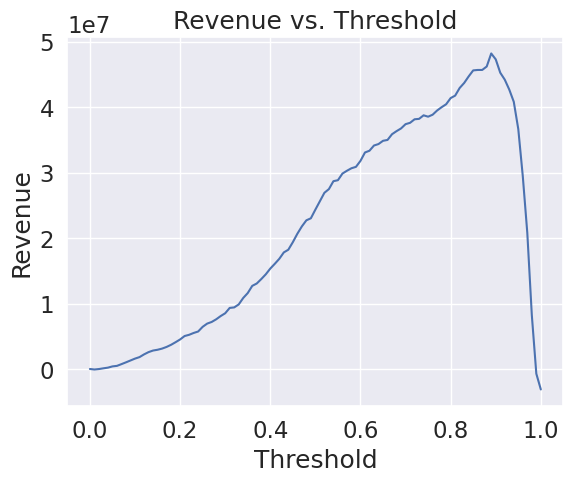

In [ ]:
# Calculate the revenue for different threshold values
thresholds = [i/100 for i in range(101)]
revenues = []
for threshold in thresholds:
    model.eval()
    y_pred = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            y_pred.extend(outputs.squeeze().cpu().numpy())

    # Calculate the metrics
    y_pred_binary = [1 if p >= threshold else 0 for p in y_pred]
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_binary).ravel()
    non_default_loans = tn
    default_loans = fn
    revenue = (0.07*non_default_loans - default_loans) * 100000
    revenues.append(revenue)

# Plot the revenue versus threshold graph
plt.plot(thresholds, revenues)
plt.xlabel('Threshold')
plt.ylabel('Profit')
plt.title('Profit vs. Threshold')
plt.show()

In [ ]:
y_pred[0:10]

[0.58182013,
 0.8878573,
 0.32509255,
 0.6437969,
 0.78440374,
 0.8509701,
 0.7845321,
 0.9591148,
 0.92502534,
 0.32209954]

In [ ]:
threshold = 0.8
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred]

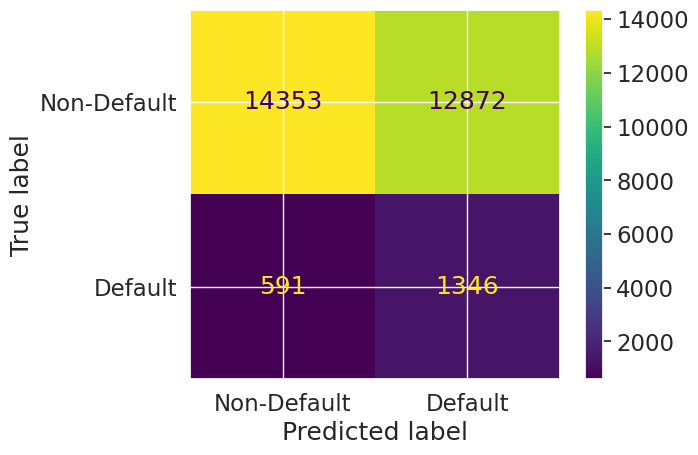

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred_binary)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Non-Default", "Default"])
cm_display.plot()
plt.show()
